# 1. Import packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.ticker as mtick
matplotlib.rcParams['font.family'] = ['Heiti TC']

In [9]:
data = '/Users/richardpang/Desktop/idc_intern-1/province analysis/merged.xlsx'
df = pd.read_excel(data)
print(df.shape)

(2191, 33)


In [10]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '区县', '省份', 'GDP',
       '第一产业GDP', '人口（万）', '农村人均可支配收入', '第二产业GDP', '第三产业GDP', '社会消费品零售总额',
       '城镇人均可支配收入', 'Province of City', 'Province of City (省)',
       'Territory of City', 'City', 'City (市)', '中文区县',
       'District Tier - Lenovo', 'District Tier', 'Cluster', 'Created By',
       'Created On', 'Last Updated By', 'Last Updated On', 'ID',
       'Allowed Status', '省内GDP占比', '省内人口占比', '500+', '省内500+占比',
       'urban_income'],
      dtype='object')

In [4]:
province_lst = df['Province of City (省)'].unique().tolist()

## 1.1 Merge data (already merged, no need later)

In [5]:
# data_company = '/Users/richardpang/Desktop/idc_intern-1/province analysis/县级学校数量.xlsx'
# df_company = pd.read_excel(data_company,sheet_name='县级人口')
# df_company.columns

Index(['Order_MM', 'Province', 'District', 'District_chinese',
       'District_zhongjing', 'District Tier - Lenovo', 'District Tier',
       'Cluster', 'Final_use_GDP', 'urban_income', 'ent_100499', 'ent_gt_1000',
       'ent_500999', '500+', 'ent_050099', 'ent_small', 'Final_use_population',
       'Total_population', 'boy_newborn', 'girl_newborn', 'boy_01to04',
       'girl_01to04', 'boy_05to09', 'girl_05to09', 'boy_10to14', 'girl_10to14',
       'boy_15to19', 'girl_15to19', 'boy_20to24', 'girl_20to24', 'boy_25to29',
       'girl_25to29', 'boy_30to34', 'girl_30to34', 'boy_35to39', 'girl_35to39',
       'boy_40to44', 'girl_40to44', 'boy_45to49', 'girl_45to49', 'boy_50to54',
       'girl_50to54', 'boy_55to59', 'girl_55to59', 'boy_60to64', 'girl_60to64',
       'boy_65to69', 'girl_65to69', 'boy_70to74', 'girl_70to74', 'boy_75to79',
       'girl_75to79', 'boy_80to84', 'girl_80to84', 'boy_above85',
       'girl_above85'],
      dtype='object')

In [6]:
# df_2 = df_company[['urban_income','District_chinese']]
# df_2 = df_2.rename({'District_chinese': '中文区县'}, axis=1)  # new method 
# print(df_2.shape)
# print(df_2.columns)

(2173, 2)
Index(['urban_income', '中文区县'], dtype='object')


In [7]:
# df_new = pd.merge(df, df_2, on='中文区县', how='outer') 
# df_new['urban_income']
# print(df_new.columns)
# # df_new.to_excel("merged.xlsx") 

Index(['Unnamed: 0.1', 'Unnamed: 0', '区县', '省份', 'GDP', '第一产业GDP', '人口（万）',
       '农村人均可支配收入', '第二产业GDP', '第三产业GDP', '社会消费品零售总额', '城镇人均可支配收入',
       'Province of City', 'Province of City (省)', 'Territory of City', 'City',
       'City (市)', '中文区县', 'District Tier - Lenovo', 'District Tier',
       'Cluster', 'Created By', 'Created On', 'Last Updated By',
       'Last Updated On', 'ID', 'Allowed Status', '省内GDP占比', '省内人口占比', '500+',
       '省内500+占比', 'urban_income'],
      dtype='object')


In [64]:
# prov_500_dict = {}
# for province in province_lst:
#   prov_500_dict[province] = df_new.loc[df_new['Province of City (省)'] == province, '500+'].sum()


In [65]:
# # df_merge = df_merge.reset_index()  # make sure indexes pair with number of rows
# company_lst = []

# for index, row in df_new.iterrows():
#   province = row['Province of City (省)']
#   company = row['500+']

#   # print("{0:.1%}".format(GDP / prov_gdp_dict[province]))
#   # GDP_lst.append("{0:.1%}".format(GDP / prov_gdp_dict[province]))
#   # population_lst.append("{0:.1%}".format(population / prov_population_dict[province]))
#   company_lst.append(company / prov_500_dict[province])
# df_new["省内500+占比"] = company_lst

In [66]:
# df_new.columns

Index(['Unnamed: 0', '区县', '省份', 'GDP', '第一产业GDP', '人口（万）', '农村人均可支配收入',
       '第二产业GDP', '第三产业GDP', '社会消费品零售总额', '城镇人均可支配收入', 'Province of City',
       'Province of City (省)', 'Territory of City', 'City', 'City (市)', '中文区县',
       'District Tier - Lenovo', 'District Tier', 'Cluster', 'Created By',
       'Created On', 'Last Updated By', 'Last Updated On', 'ID',
       'Allowed Status', '省内GDP占比', '省内人口占比', '500+', '省内500+占比'],
      dtype='object')

In [8]:
# df_new.to_excel("merged.xlsx") 

# 2. Plot

## 2.1 Example

   abnormal  fix  normal
0        90   60     140
1        40   70     160
2        30   65     170
3        30   70     180
4        30   70     190
5        25   60     200
6        25   50     210
7        20   45     220
8        15   45     230
9        10   45     240


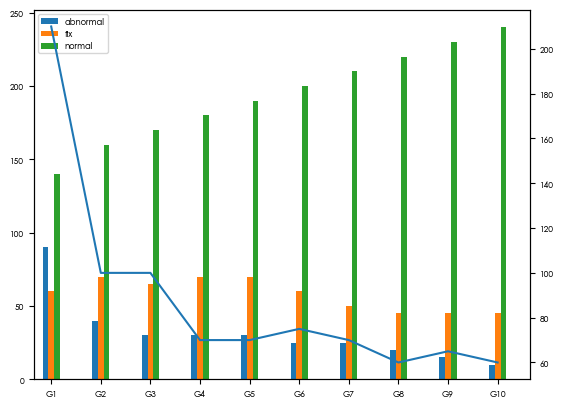

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30,30,25,25,20,15,10],
 'fix' : [60,70,65,70,70,60,50,45,45,45],
 'normal' : [140,160,170,180,190,200,210,220,230,240],
 'bad_rate' : [210,100,100,70,70,75,70,60,65,60]})
print(m1_t[['abnormal','fix','normal']])
m1_t[['abnormal','fix','normal']].plot(kind='bar', width = width)
m1_t['bad_rate'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'))

plt.show()

## 2.2 Plot Province 

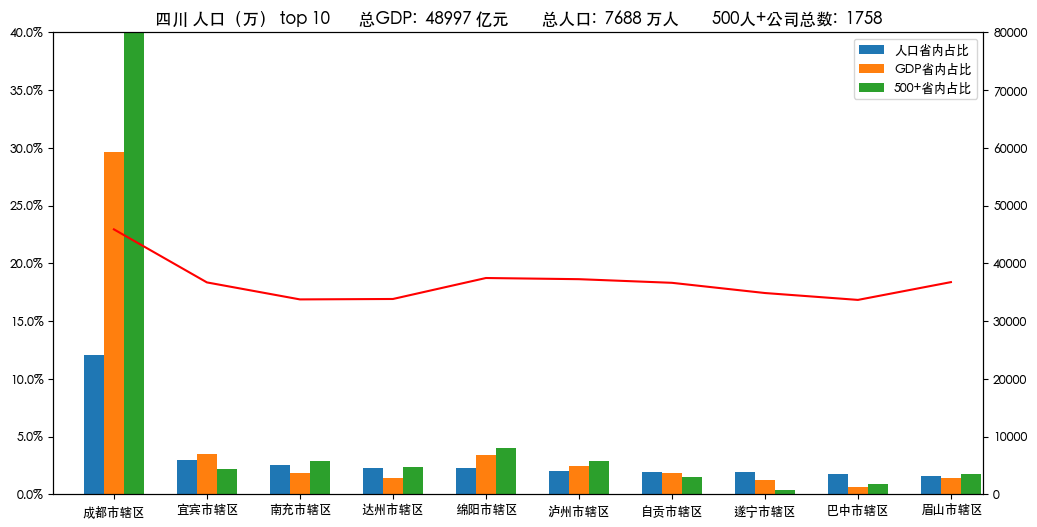

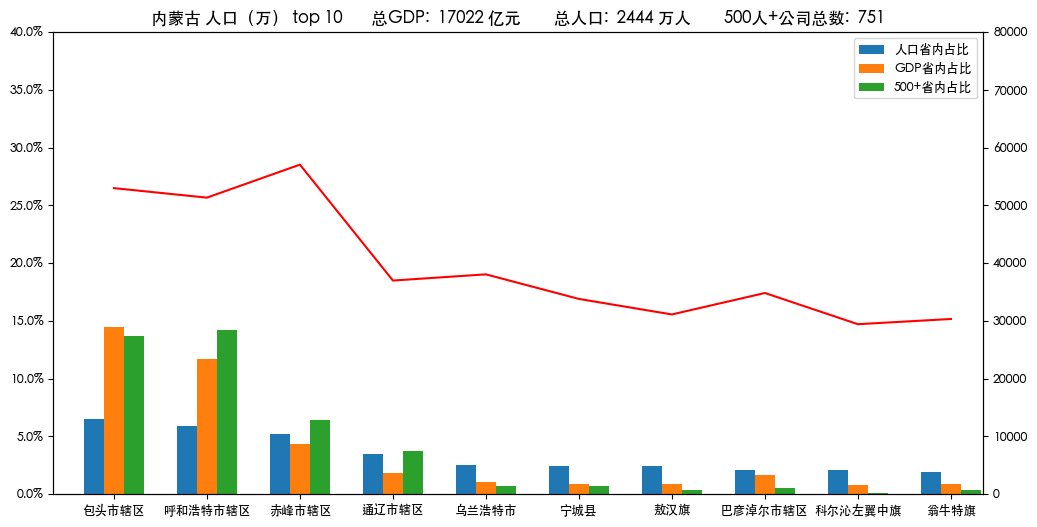

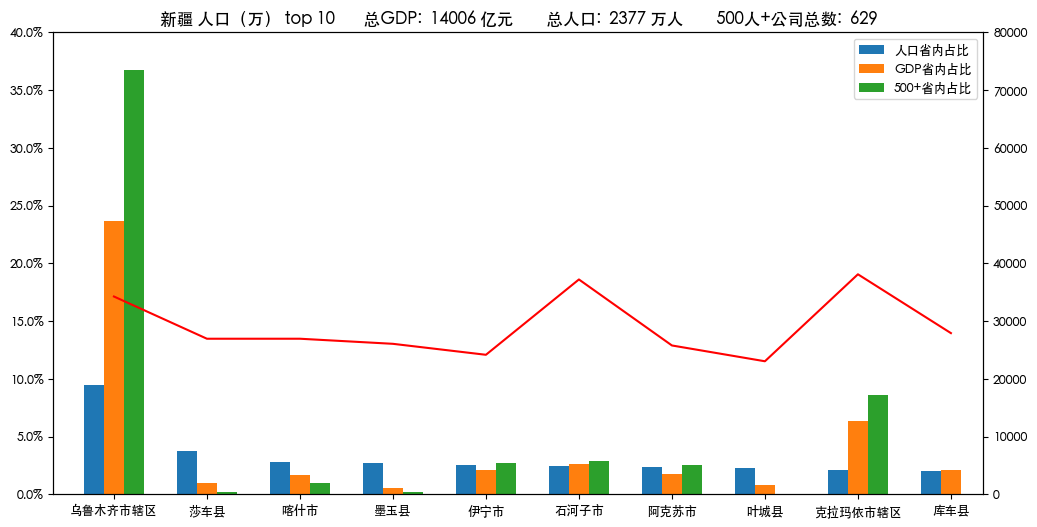

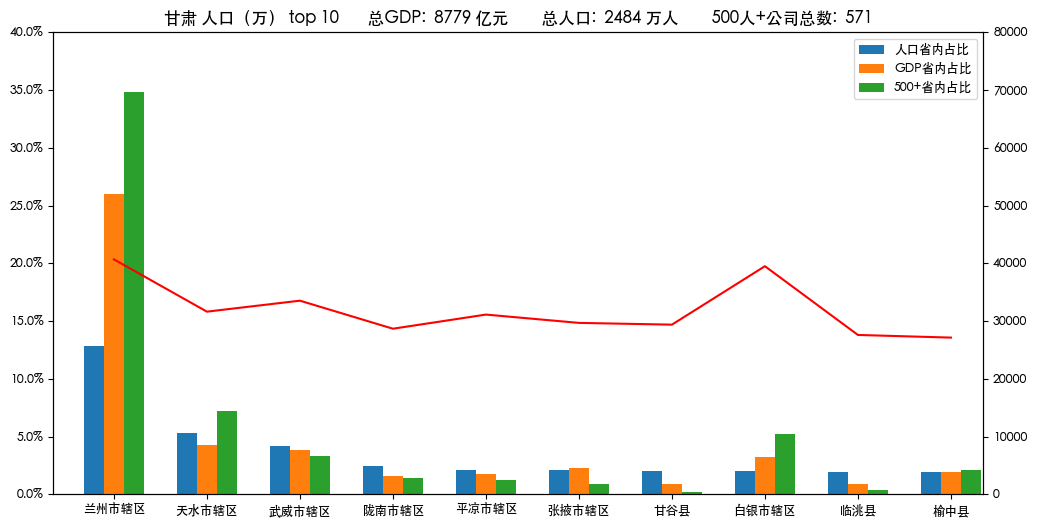

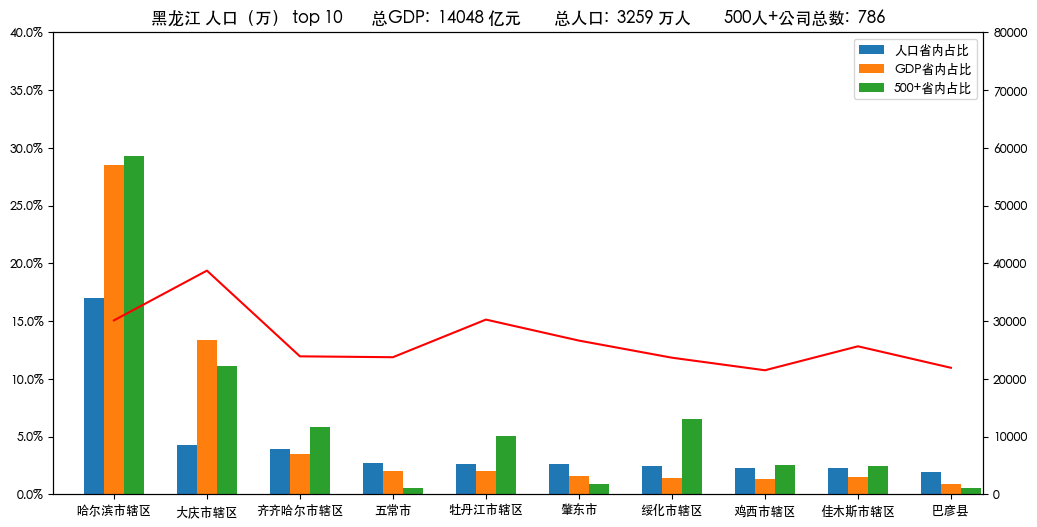

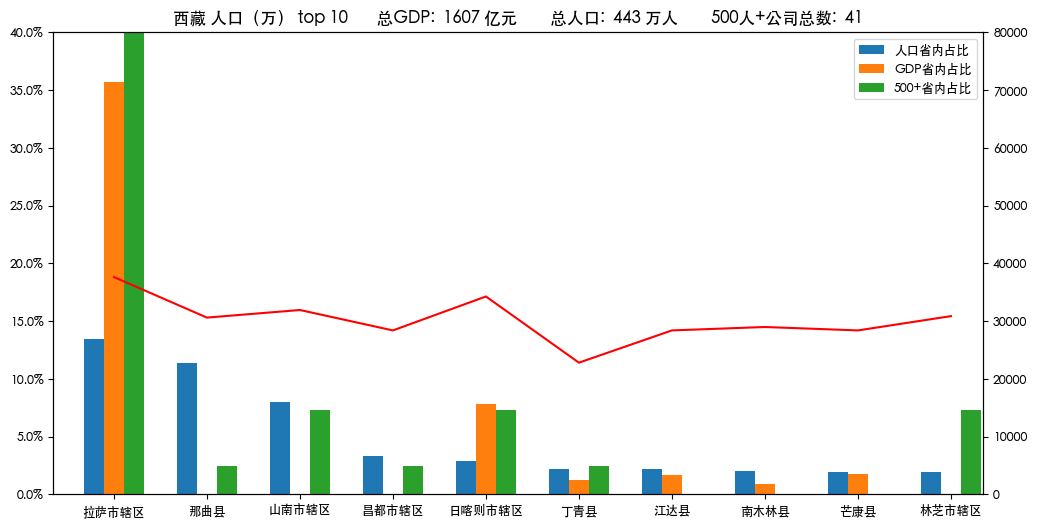

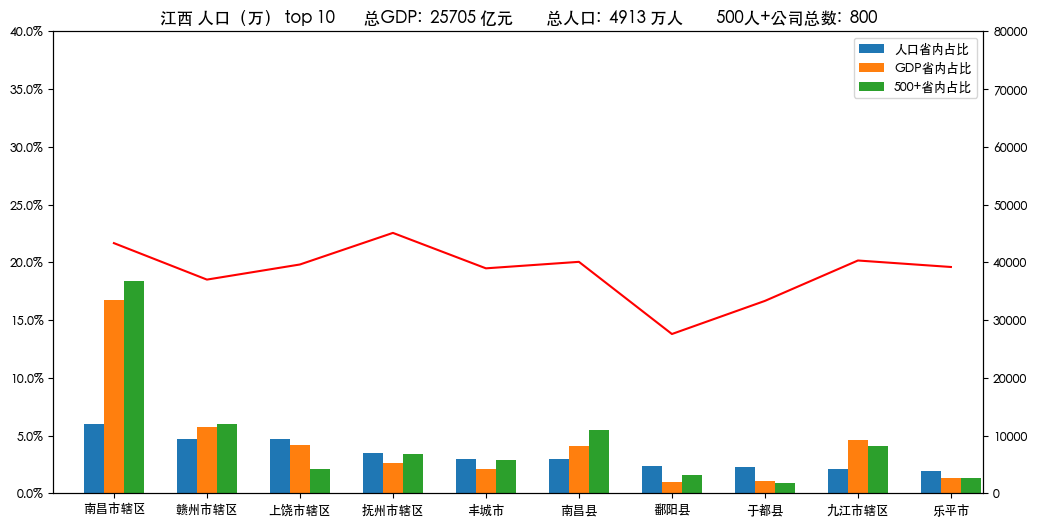

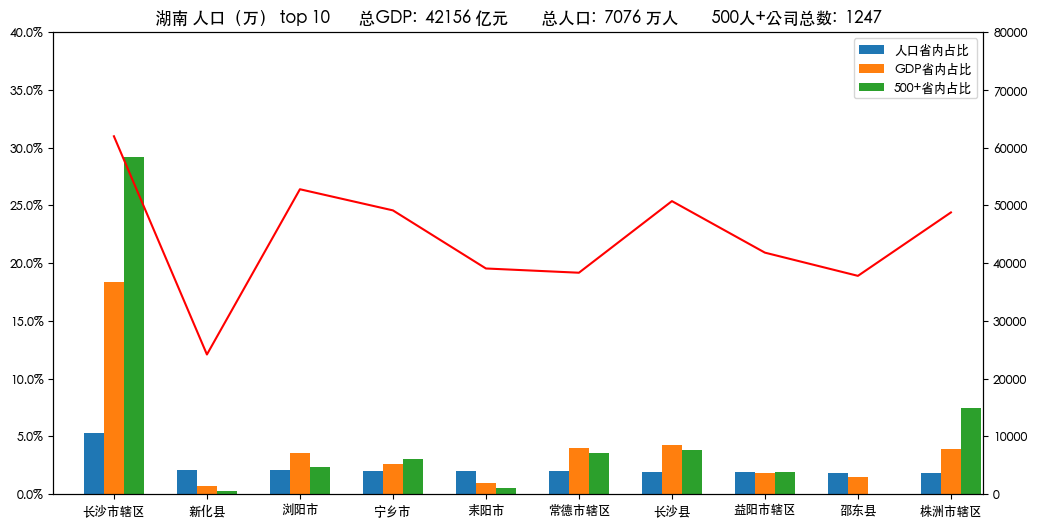

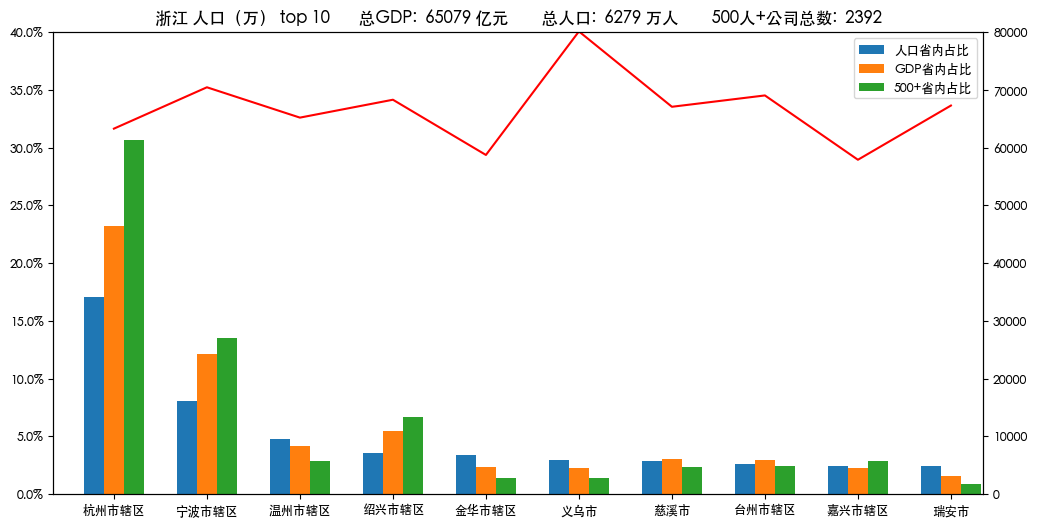

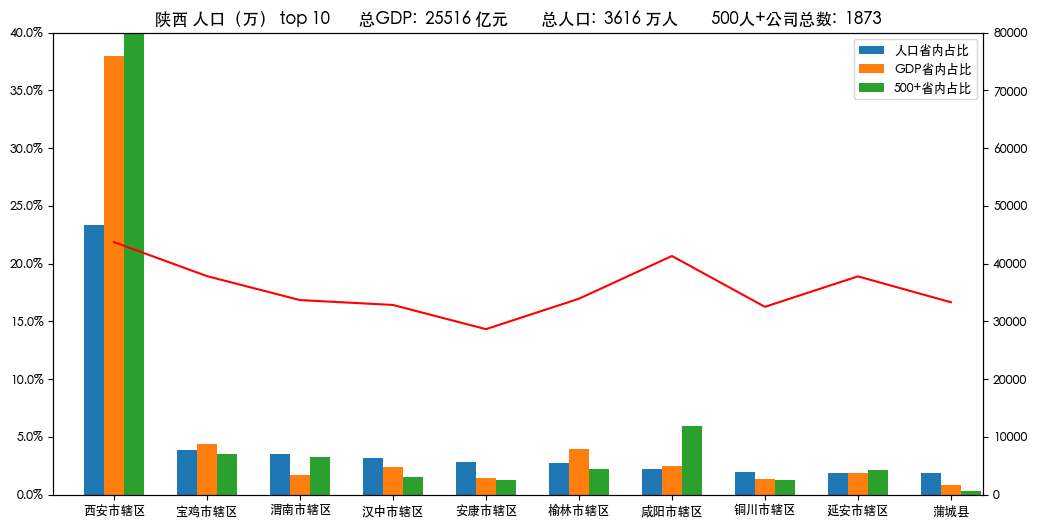

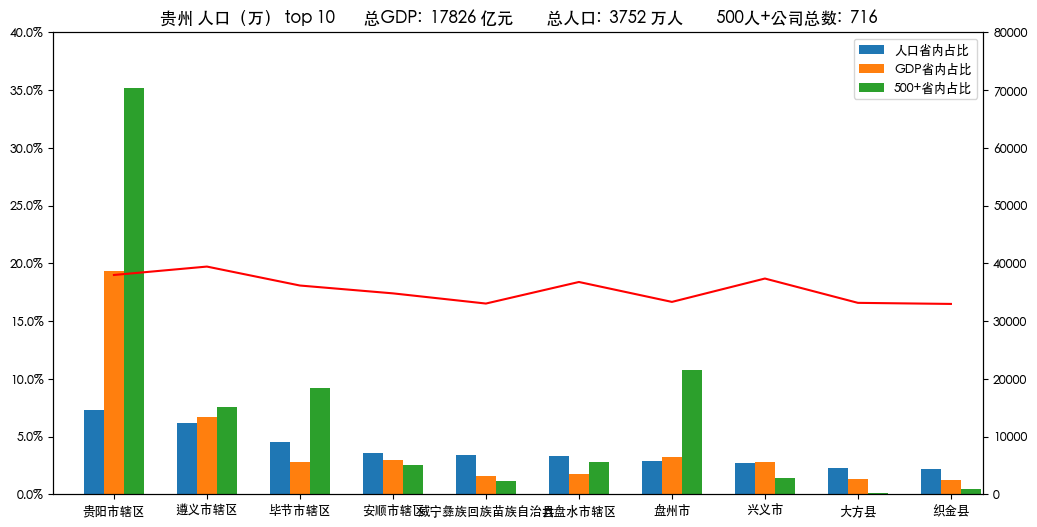

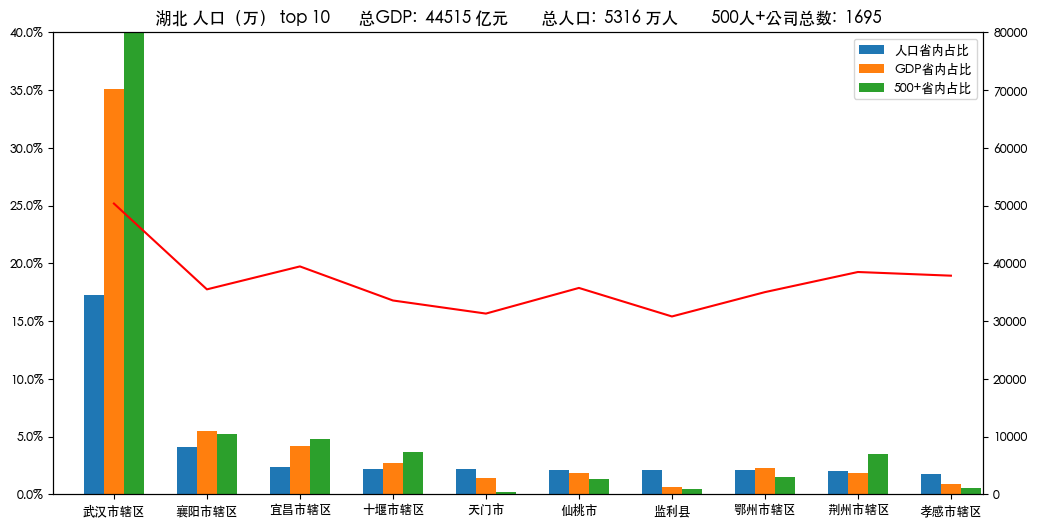

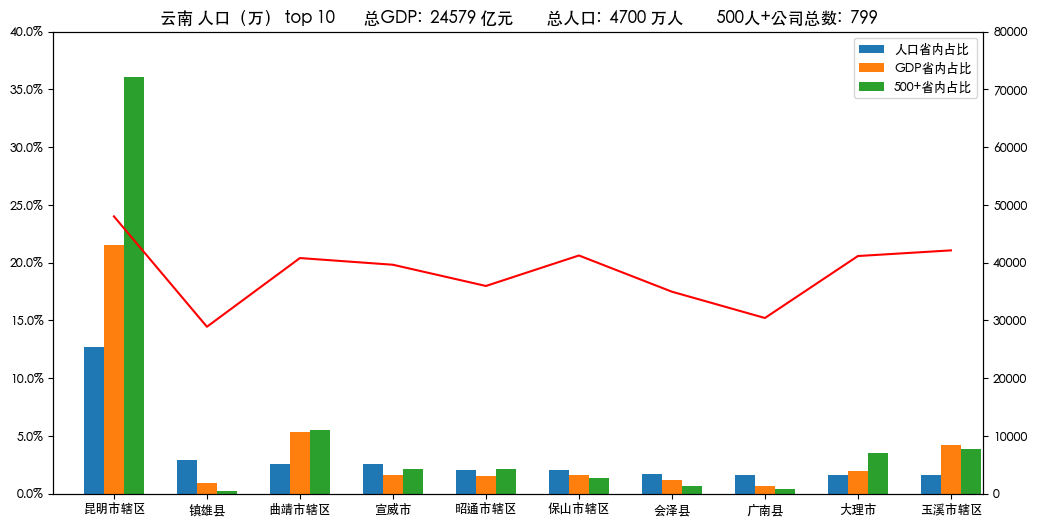

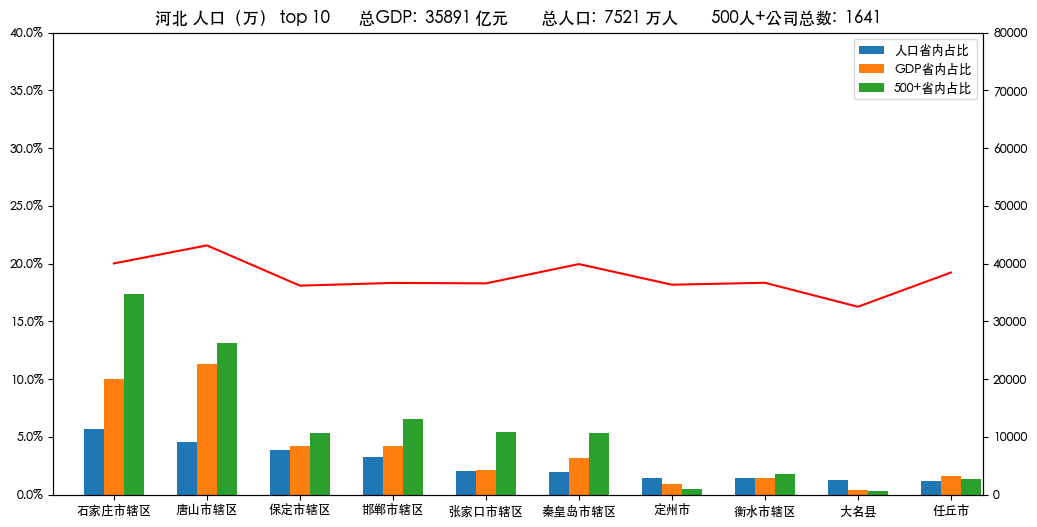

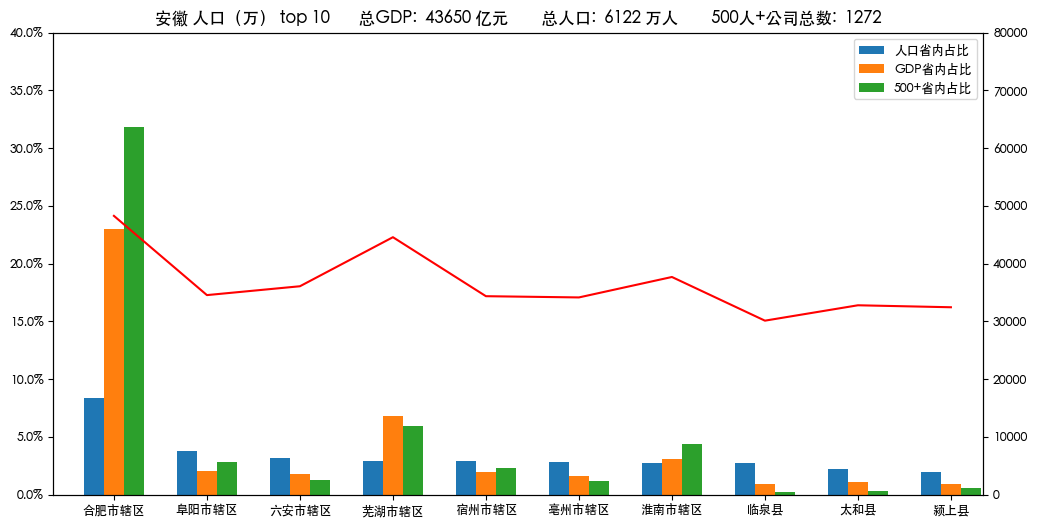

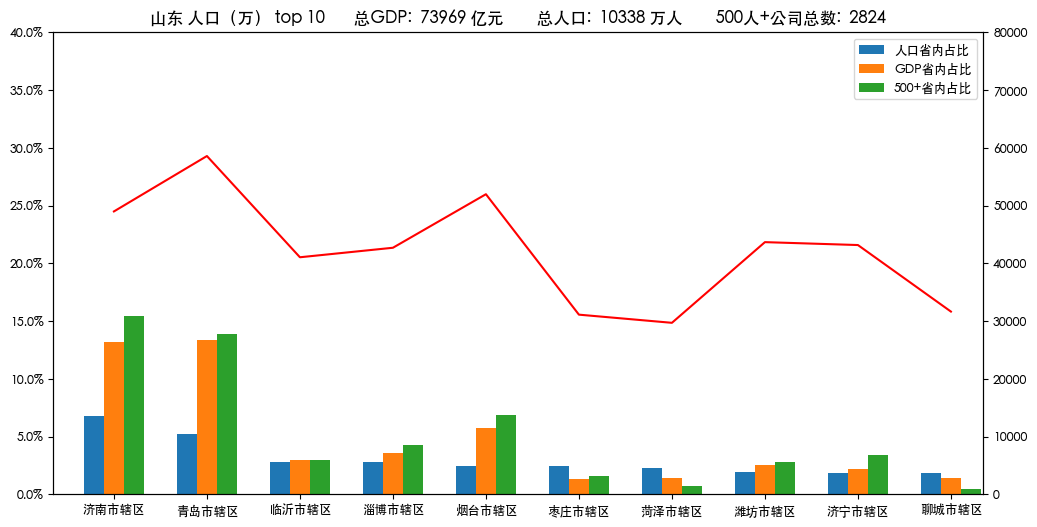

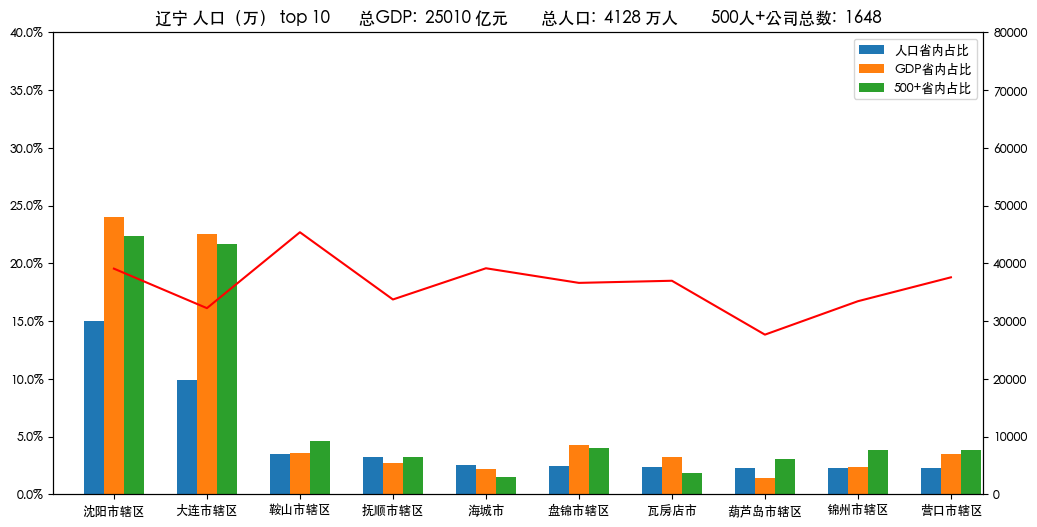

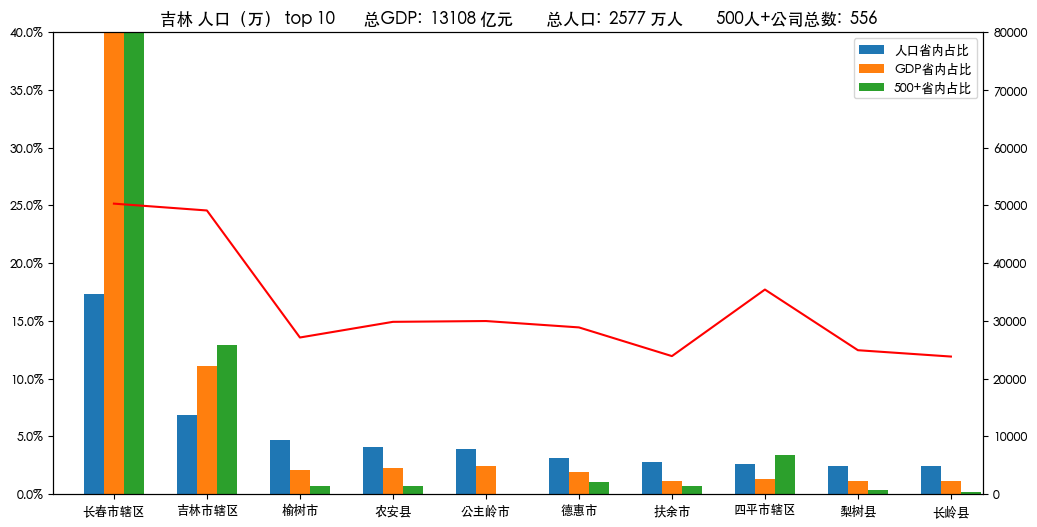

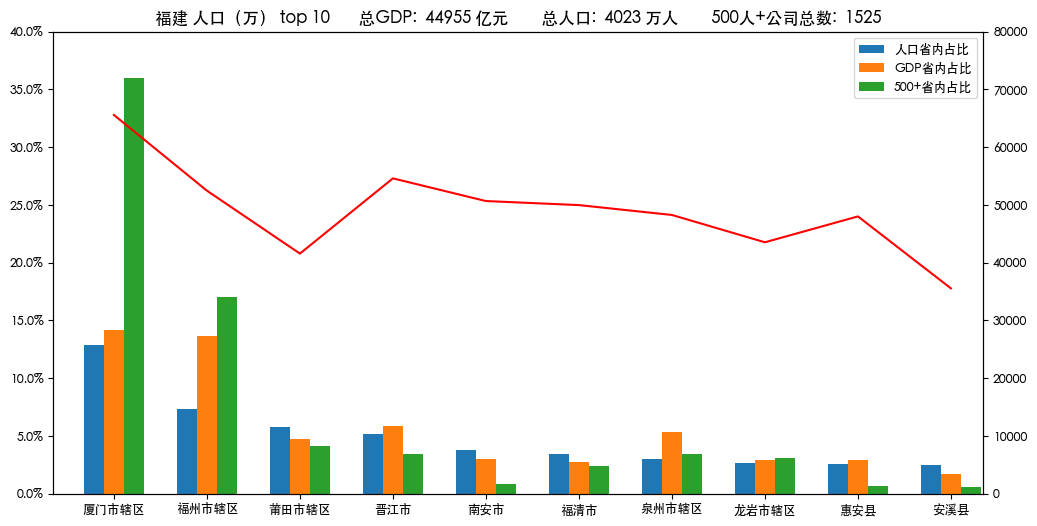

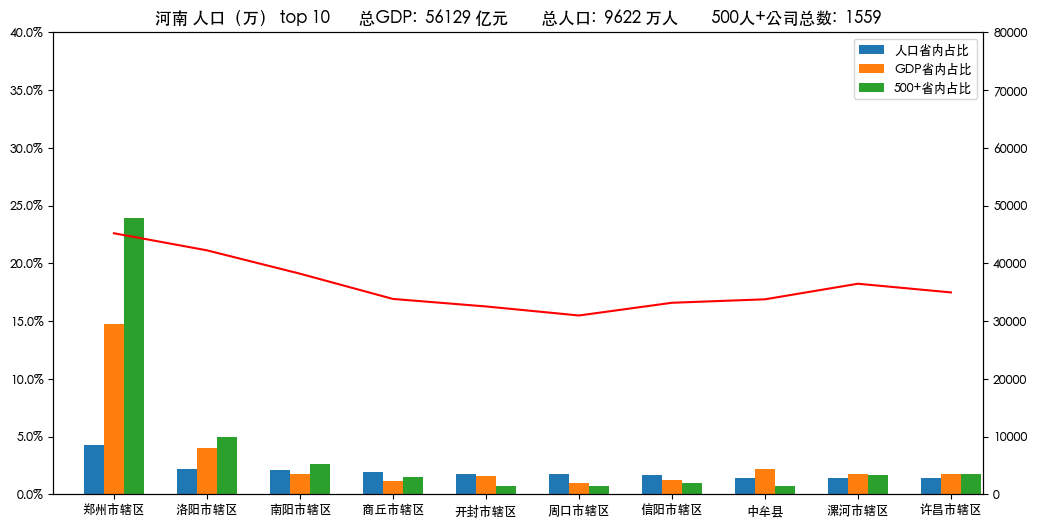

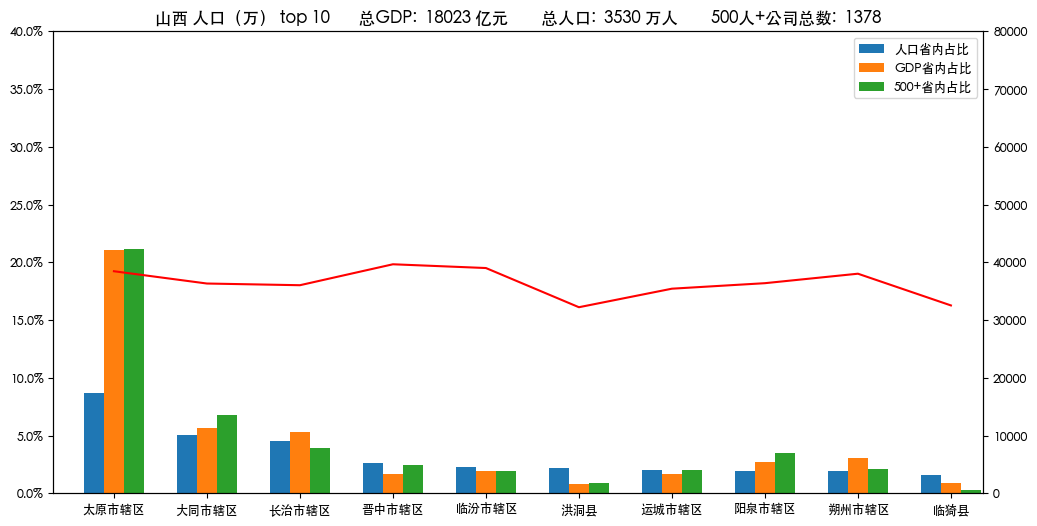

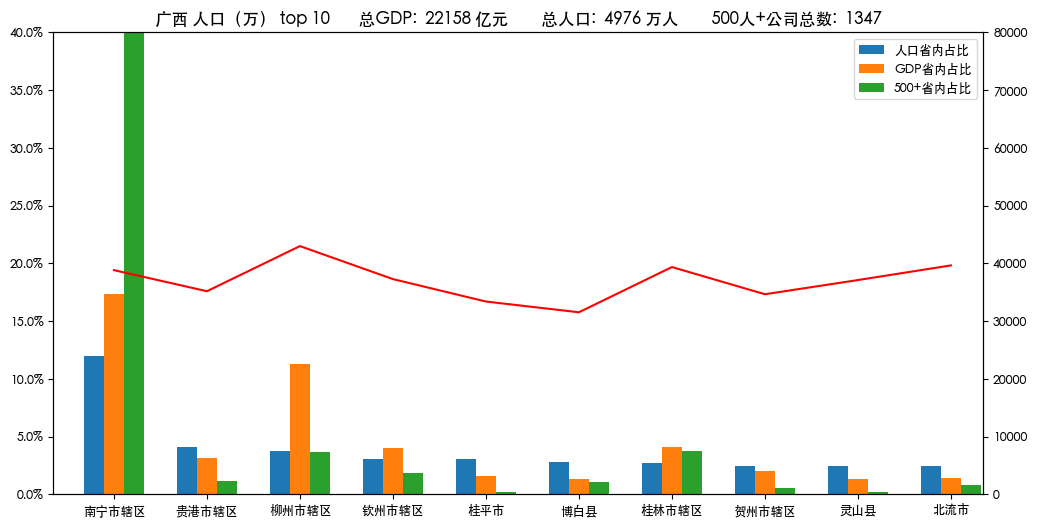

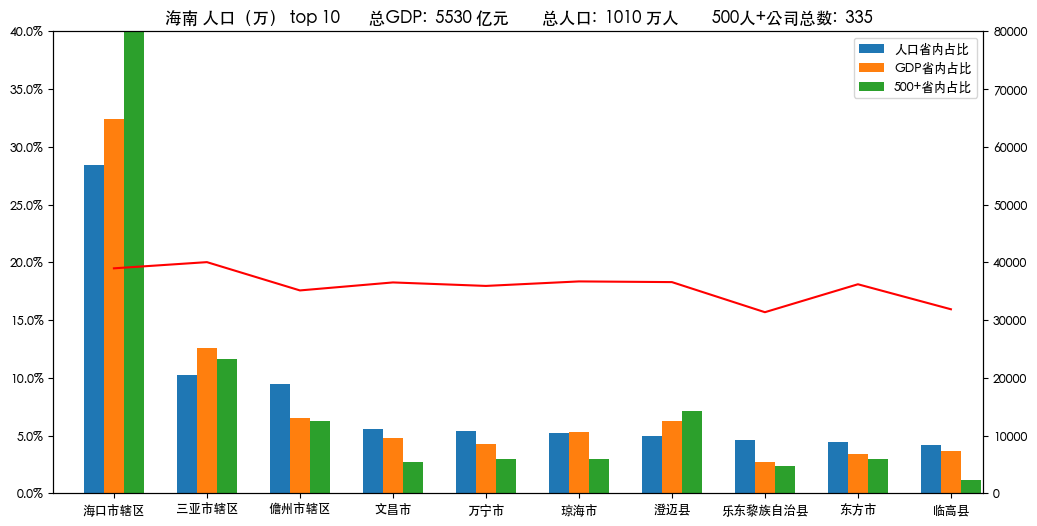

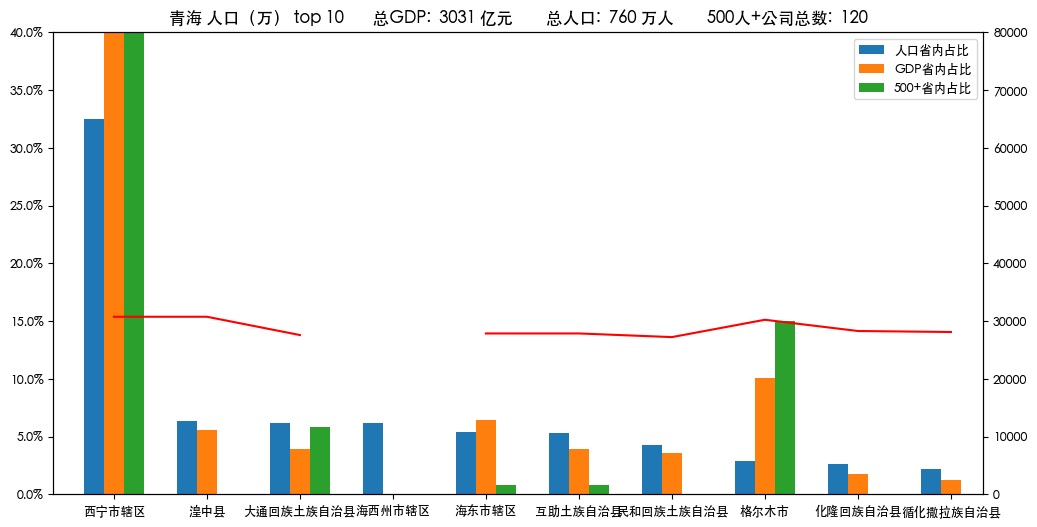

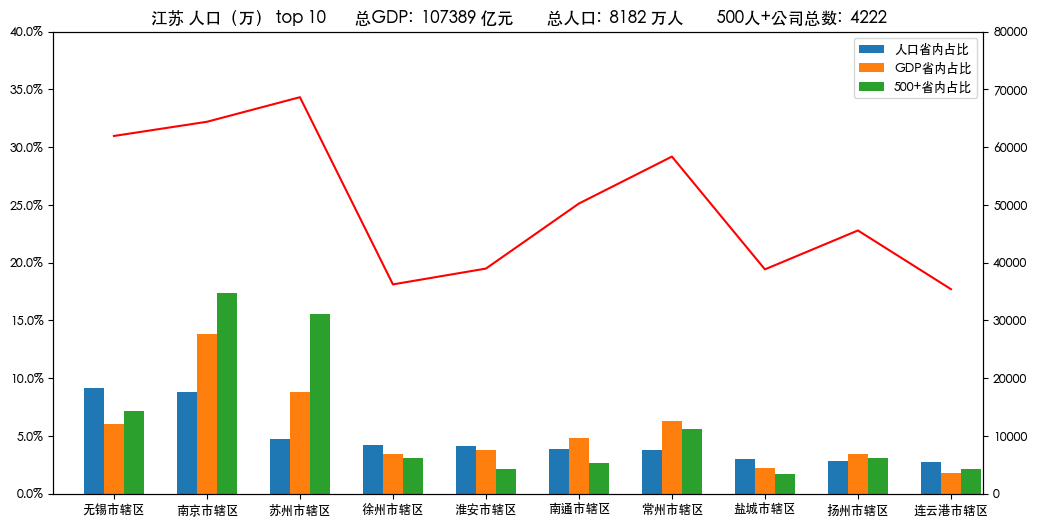

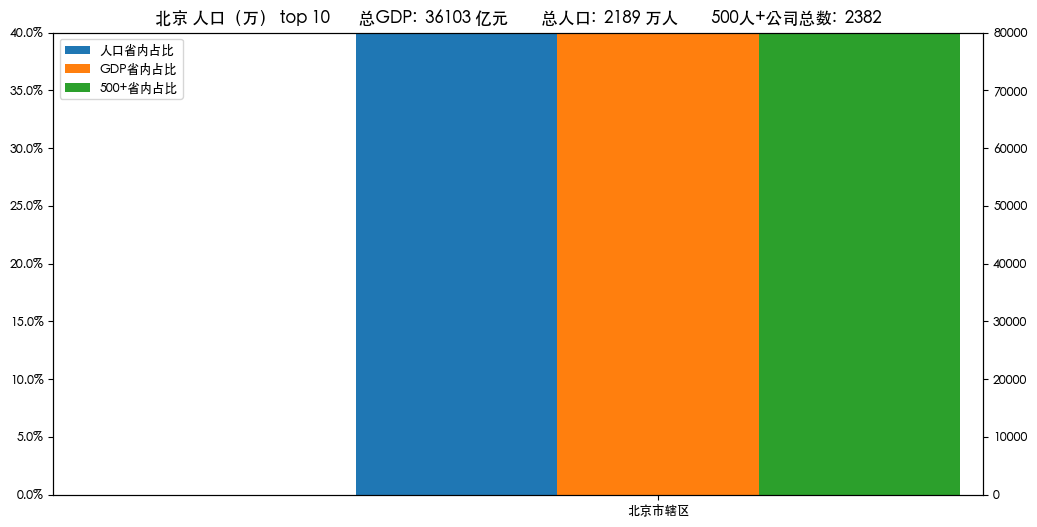

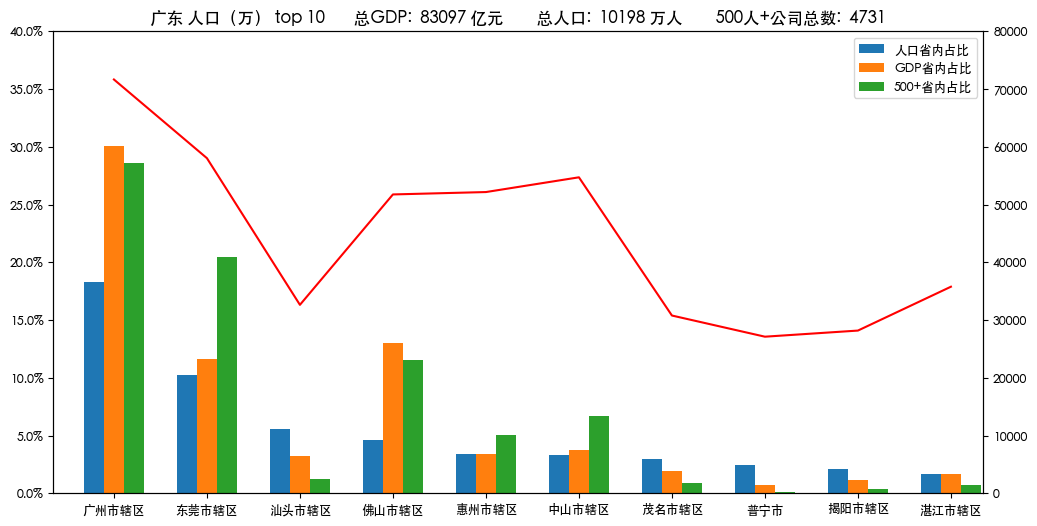

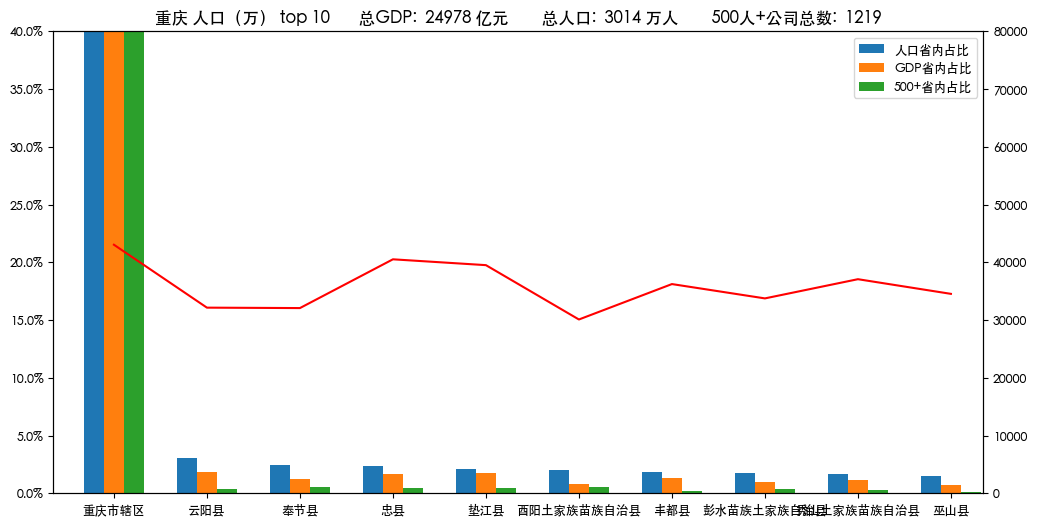

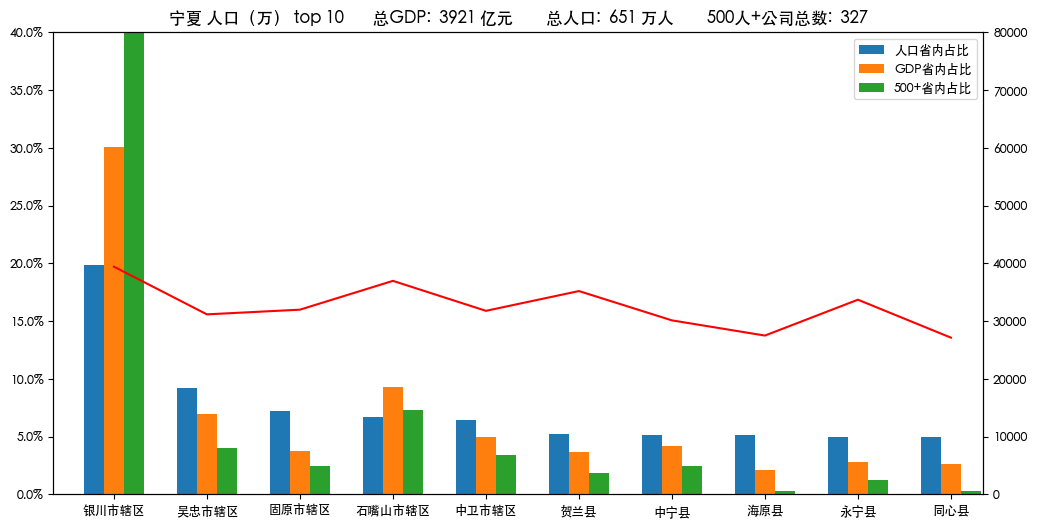

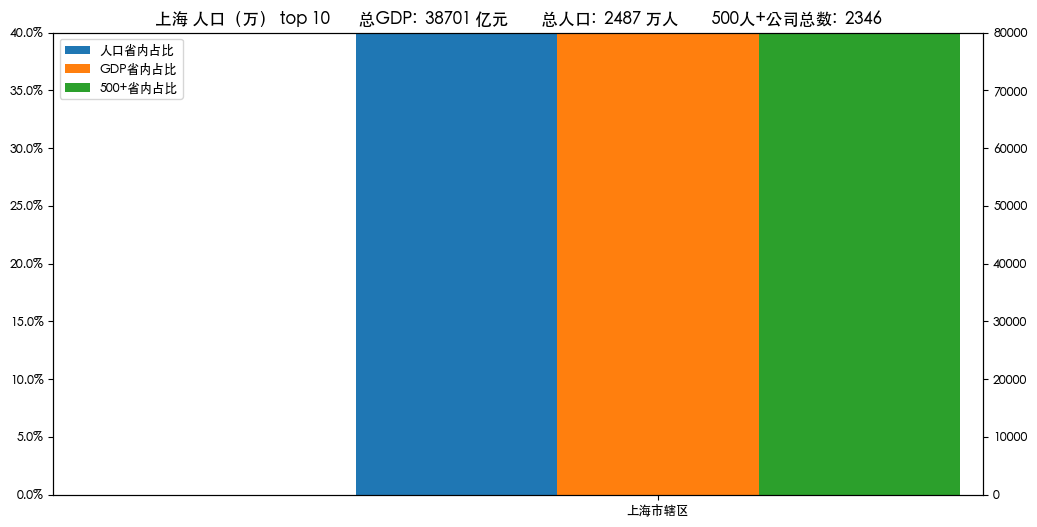

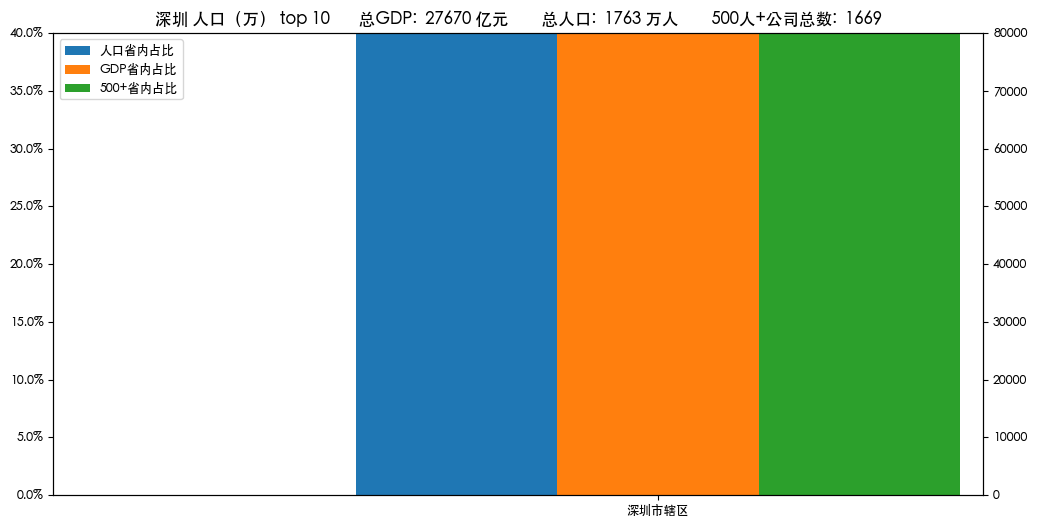

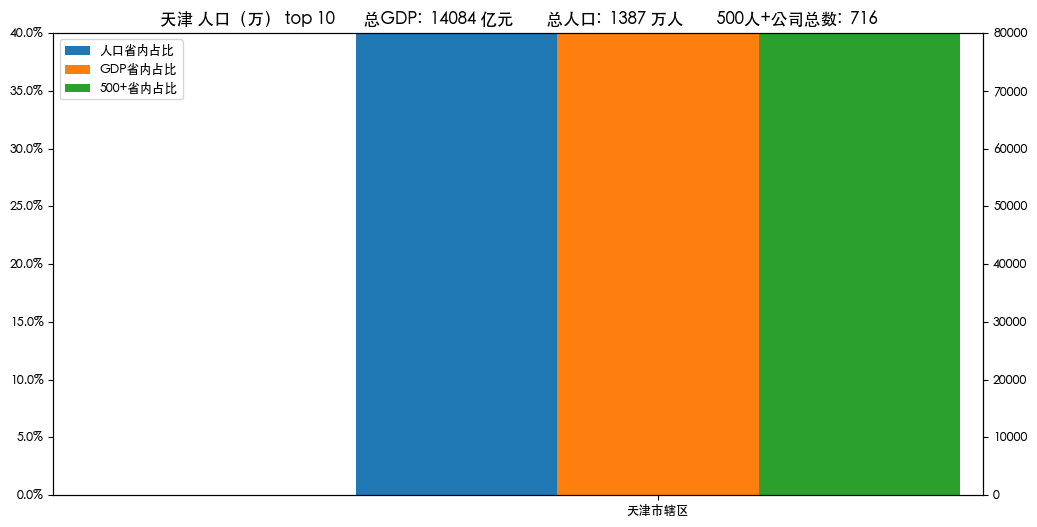

In [36]:
plt.rcParams.update({'font.size': 9}) # must set in top
for province in province_lst:
  # 省级总数
  total_gdp = round(df.loc[df['Province of City (省)'] == province, 'GDP'].sum())
  total_population = round(df.loc[df['Province of City (省)'] == province, '人口（万）'].sum())
  total_company = round(df.loc[df['Province of City (省)'] == province, '500+'].sum())
  # print(total_gdp,total_population,total_company)

  # 每个省创建一个df, 选取top_k, order by populatopn by default
  k = 10
  width = .65 # width of a bar
  province_df = df[df['Province of City (省)'] == province] 
  order_by = '人口（万）'
  top_k_df = province_df.nlargest(k, order_by)

  urban_income = top_k_df['urban_income'].to_list()
  rural_income = top_k_df['农村人均可支配收入'].to_list()
  population_percentage = top_k_df['省内人口占比'].to_list()
  gdp_percentage = top_k_df['省内GDP占比'].to_list()
  population = top_k_df['人口（万）'].to_list()
  district_lst = top_k_df['中文区县'].to_list()
  company_lst = top_k_df['省内500+占比'].to_list()


  sample = pd.DataFrame({
    '人口省内占比' : population_percentage,
    'GDP省内占比' : gdp_percentage,
    '500+省内占比' : company_lst,
    '城镇人均可支配收入' : urban_income})
    # print(m1_t[['bar1','bar2','bar3']])
  ax = sample[['人口省内占比','GDP省内占比','500+省内占比']].plot(kind='bar', width = width,figsize=(12,6),ylim=(0,0.4))
  ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
  # for p in ax.patches:
  #   ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) 
  sample['城镇人均可支配收入'].plot(secondary_y=True,color='r',ylim=(0,80000)) 

  ax = plt.gca()
  
  plt.xlim([-width, len(sample['500+省内占比'])-width])
  ax.set_xticklabels((i for i in top_k_df['中文区县']))
  title = province+' '+ order_by+' '+'top 10' 
  subtitle = '   '+ '    总GDP:  ' + str(total_gdp) + ' 亿元'+ '        总人口:  ' + str(total_population) + ' 万人  '+ '      500人+公司总数:  ' + str(total_company)
  # print(subtitle)
  plt.title(title + subtitle, fontsize = 12)
  plt.savefig('11.14/'+title+'.png')
  plt.show()

       省内GDP占比    省内人口占比
176   0.296160  0.120939
1942  0.035022  0.029867
1138  0.018042  0.025195
259   0.014287  0.022740
1097  0.033972  0.022700
1052  0.024103  0.019849
2170  0.018168  0.019000
1533  0.012735  0.018951
81    0.006327  0.017486
1082  0.013776  0.015597


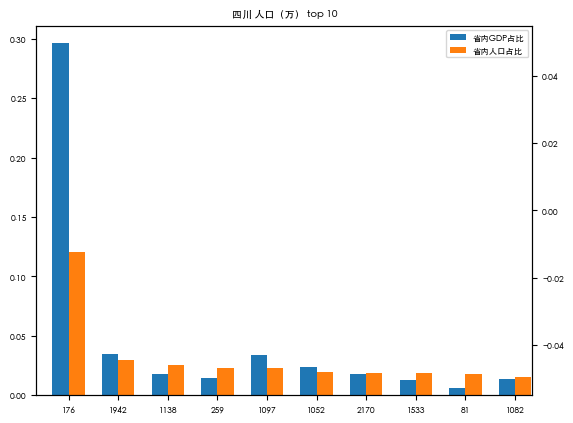

In [35]:
plt.rcParams.update({'font.size': 6}) # must set in top
for province in province_lst:
  # 每个省一个df, top_k, order by urban income by default
  k = 10
  width = .65 # width of a bar
  province_df = df[df['Province of City (省)'] == province] 
  order_by = '人口（万）'
  top_k_df = province_df.nlargest(k, order_by)


  # ax = top_k_df['城镇人均可支配收入'].plot(kind='line',secondary_y=True,color = 'r')
  print(top_k_df[['省内GDP占比','省内人口占比']])
  top_k_df[['省内GDP占比','省内人口占比']].plot(kind='bar',width=width)
  # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

  # plt.xlim([-width, len(top_k_df['城镇人均可支配收入'])-width])  
  top_k_df['城镇人均可支配收入'].plot(secondary_y=True)

  # plt.xlim([-width, len(top_k_df['城镇人均可支配收入'])-width]) 
  # ax = plt.gca()
  
  ax = plt.gca()
  plt.xlim([-width, len(top_k_df['城镇人均可支配收入'])-width])
  # ax.set_xticklabels((i for i in top_k_df['中文区县']))
  title = province+' '+ order_by+' '+'top 10'
  plt.title(title)
  plt.show()
  # df.plot(figsize=(3,3));
  break
